<a href="https://colab.research.google.com/github/sks95/python_basics/blob/main/E2E_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to End Project

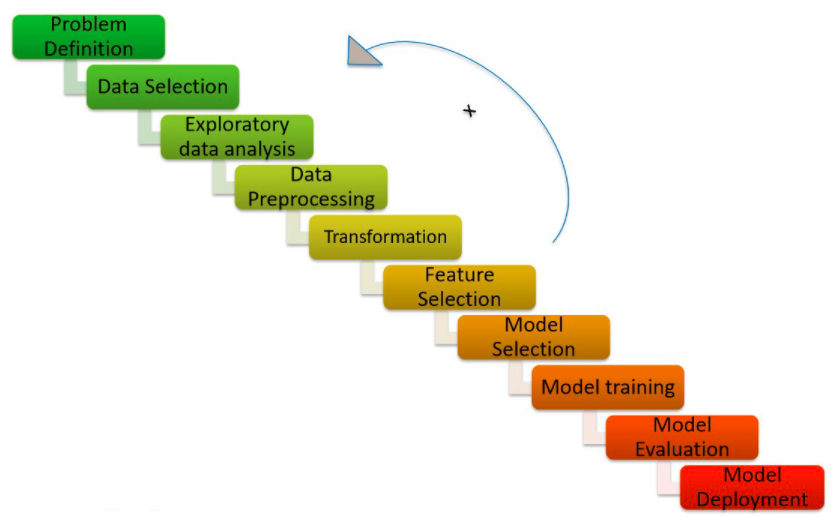

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/purna135/ML-Datasets/main/California-Housing-Prices.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Predict median value of house price

In [2]:
# will select (n) random values 

df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4292,-118.29,34.09,34.0,2716.0,1114.0,2991.0,1021.0,1.7514,187500.0,<1H OCEAN
6801,-118.13,34.09,42.0,700.0,212.0,662.0,210.0,3.0078,191700.0,<1H OCEAN
13374,-117.51,34.16,2.0,718.0,98.0,119.0,50.0,4.1000,315000.0,INLAND
10471,-117.72,33.49,4.0,3623.0,734.0,1129.0,530.0,5.7281,500001.0,<1H OCEAN
13725,-117.19,34.07,40.0,2374.0,500.0,1772.0,455.0,2.1890,72500.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Change data type of columns from larger to smaller datatype

In [5]:
df['housing_median_age'].dtype

dtype('float64')

In [6]:
df['housing_median_age'] = df['housing_median_age'].astype('int8')
df['housing_median_age'].dtype

dtype('int8')

In [7]:
df.info()

# earlier 1.6+ mb to 1.4+ mb now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int8   
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int8(1), object(1)
memory usage: 1.4+ MB


# Visualize

In [8]:
df.isna().sum() 

# this shows that total bedrooms have null values 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

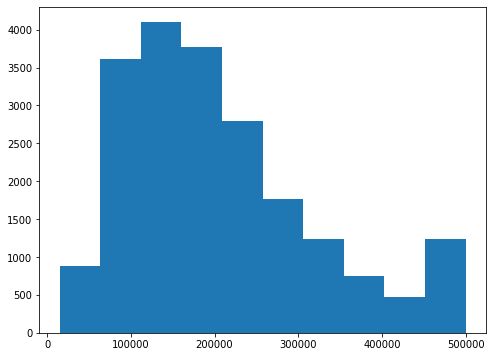

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['median_house_value']);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


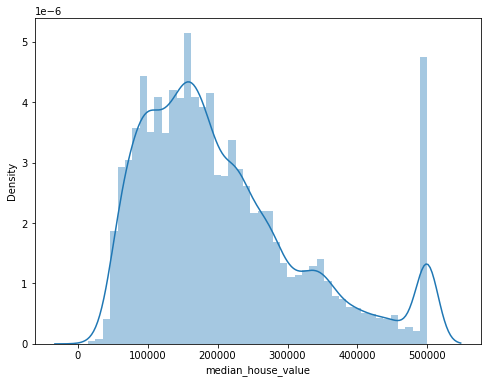

In [10]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(df['median_house_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


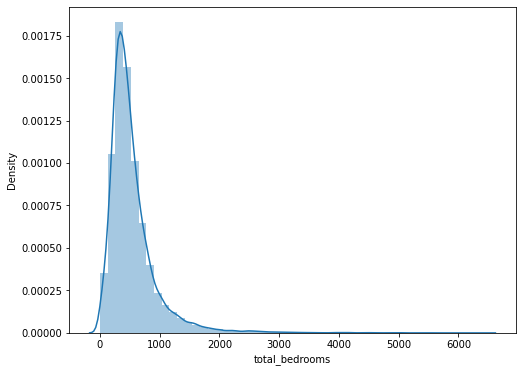

In [11]:

plt.figure(figsize=(8,6))
sns.distplot(df['total_bedrooms'])

In [12]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

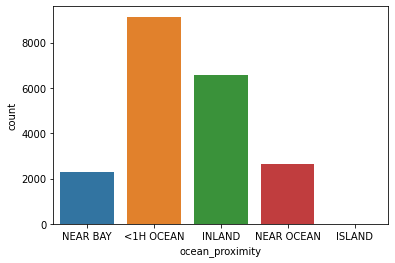

In [13]:
# display count values 

sns.countplot(data=df , x='ocean_proximity');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


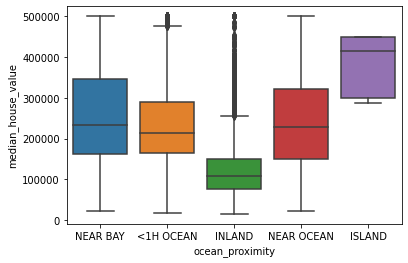

In [14]:
sns.boxplot(df['ocean_proximity'], df['median_house_value'])

In [15]:
import plotly.express as px

px.box(df, x=df['ocean_proximity'], y=df['median_house_value'])

What we can infer from above graph ?

island having higher house prices as compared to others

inland has minimum

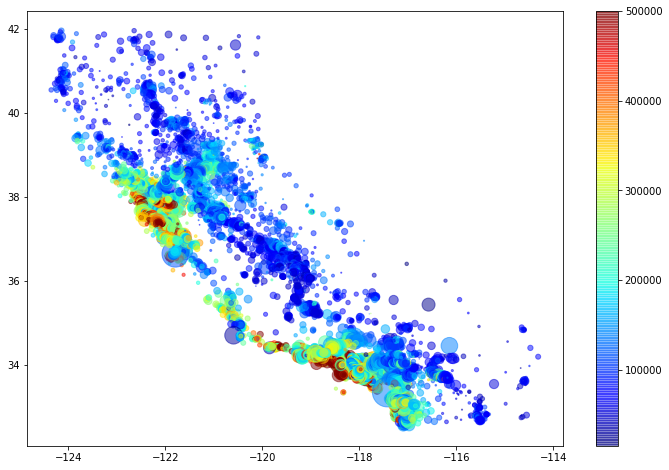

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(df['longitude'], df['latitude'], c = df['median_house_value'], s = df['population']/40, alpha = 0.5, cmap='jet')
plt.colorbar()
plt.show()

In [17]:
# finding correlation only to the median house value

df.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

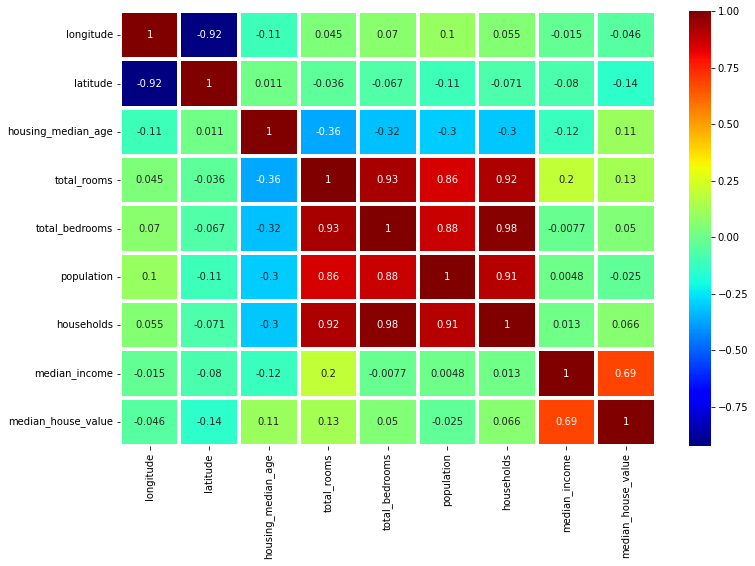

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='jet', annot = True, lw = 3)

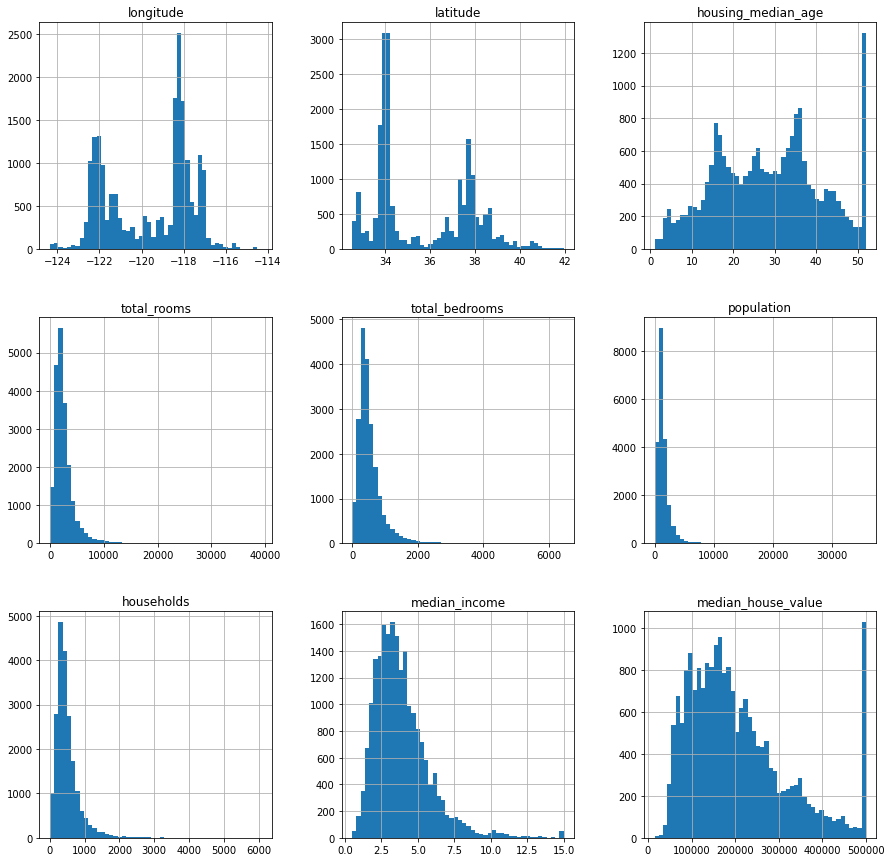

In [19]:
df.hist(bins = 50, figsize=(15,15))
plt.show()

# Feature Engineering

In [20]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5966,-117.81,34.11,21,3481.0,808.0,1866.0,746.0,3.6201,150400.0,INLAND
7426,-118.20,33.95,35,1924.0,520.0,2101.0,541.0,2.4267,151500.0,<1H OCEAN
18566,-121.74,36.92,14,3355.0,695.0,1350.0,697.0,2.6506,164600.0,<1H OCEAN
10058,-121.06,39.29,14,1864.0,331.0,894.0,332.0,3.4028,171800.0,INLAND
17297,-119.52,34.41,20,4489.0,800.0,2867.0,765.0,4.8060,279700.0,<1H OCEAN


In [21]:
df['Rooms_per_house'] = df['total_rooms']/df['households']

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Rooms_per_house
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


# Missing Values Handling
- drop - row/col
- fill na values if null values are a big number

In [23]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
Rooms_per_house         0
dtype: int64

In [24]:
df['total_bedrooms'].median() 

435.0

In [25]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
Rooms_per_house       0
dtype: int64

In [26]:
df["rooms_per_population"] = df["total_rooms"]/df["population"]

In [27]:
df["bedroom_per_room"] = df["total_bedrooms"]/df["total_rooms"]

In [28]:
df.corr()["median_house_value"].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688075
rooms_per_population    0.209482
Rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049454
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedroom_per_room       -0.220049
Name: median_house_value, dtype: float64

In [29]:
df['total_rooms'].min()

# filling missing values in total bedroom with median is wrong 

2.0

Simple imputer is used to fill and replace null values predefined function

In [30]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "mean")


df['total_bedrooms'] = si.fit_transform(df[['total_bedrooms']])  # fill mean

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  int8   
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   median_house_value    20640 non-null  float64
 9   ocean_proximity       20640 non-null  object 
 10  Rooms_per_house       20640 non-null  float64
 11  rooms_per_population  20640 non-null  float64
 12  bedroom_per_room      20640 non-null  float64
dtypes: float64(11), int8(1), object(1)
memory usage: 1.9+ MB


There is strong correlation between ocean proximity and Housing prices

But the value is categorical and needs to be numeriacal 

Diferent Types of Encoding
- ordinal encoding
- one hot encoding
- level encoding
- label encoding


# Text and Categorical Value

In [32]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
# now will use ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit_transform(df[['ocean_proximity']])   # using 2d or 2 brackets to give as dataframe instead of series

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [34]:
# another way to do one hot encoding replacing with only binary values

pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [55]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
oh.fit_transform(df[["ocean_proximity"]]).toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Scaling
- Normalization [0, 1] range change
- Standardization [mean = 0, variance = 1]

In [38]:
numerical_df = df.drop('ocean_proximity', axis = 1)
numerical_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Rooms_per_house,rooms_per_population,bedroom_per_room
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.732919,0.146591
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.956685,0.155797
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.957661,0.129516
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.283154,0.184458
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.879646,0.172096


## Using Normalize

In [41]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
nor.fit(numerical_df)
transformed = nor.transform(numerical_df)

In [44]:
transformed.min(), transformed.max()

# minimum se max range 0 to 1 le aya

(-0.008211350689986466, 0.9999999606746969)

## Using Standardize

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(numerical_df)
transformed = ss.transform(numerical_df)

In [49]:
transformed.mean(), transformed.var()

(-7.97065543053885e-16, 0.9999999999999999)

# Transformers

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_col = ['ocean_proximity']
num_col = list(df.drop(cat_col, axis=1).columns)

col_transf = ColumnTransformer([
                                ('OneHot_cat', OneHotEncoder(), cat_col),
                                ('num_Scaling', StandardScaler, num_col)
])